In [20]:
import tensorflow as tf
from tensorflow.keras import layers ,models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist



In [21]:
(train_img, train_labels), (test_img, test_labels) = mnist.load_data()

#normalising the the imgaes to range [0,1]
train_img, test_img = train_img/255,test_img/255

#reshaping the images (number_of_images, 28, 28, 1) 
train_img, test_img = train_img.reshape(train_img.shape[0],28,28,1), test_img.reshape(test_img.shape[0],28,28,1)





In [22]:
#data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_augumentation = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

data_augumentation.fit(train_img)
'''the code sets up data augmentation to enhance the training process by generating varied versions of the training images, 
thereby improving the model's ability to generalize and perform well on new data.'''



"the code sets up data augmentation to enhance the training process by generating varied versions of the training images, \nthereby improving the model's ability to generalize and perform well on new data."

In [23]:
model  = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10,activation='softmax')
])

model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

#training the model with data augmentation
history = model.fit(data_augumentation.flow(train_img,train_labels,batch_size = 100),
                    epochs = 12,
                    validation_data = (test_img,test_labels))


Epoch 1/12


c:\Users\Aditya Dwaraki Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


600/600 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.6108 - loss: 1.1450 - val_accuracy: 0.9766 - val_loss: 0.0685
Epoch 2/12
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9246 - loss: 0.2646 - val_accuracy: 0.9864 - val_loss: 0.0420
Epoch 3/12
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9468 - loss: 0.1853 - val_accuracy: 0.9858 - val_loss: 0.0456
Epoch 4/12
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9590 - loss: 0.1538 - val_accuracy: 0.9878 - val_loss: 0.0421
Epoch 5/12
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9656 - loss: 0.1220 - val_accuracy: 0.9903 - val_loss: 0.0305
Epoch 6/12
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9686 - loss: 0.1076 - val_accuracy: 0.9927 - val_loss: 0.0237
Epoch 7/12
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9721 - loss: 0.1055 - val_accuracy: 0.9904 - val_loss: 0.0318
Epoch 8/12
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9744 - loss: 0.0919 - val_accurac

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9902 - loss: 0.0252


test accuracy: 0.9923999905586243
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


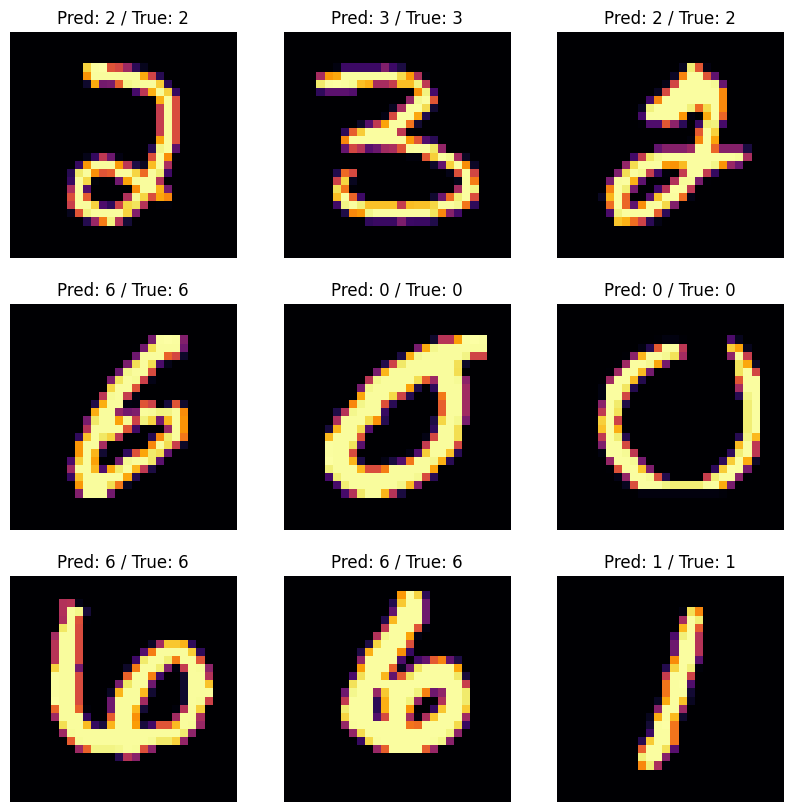

In [44]:
#evaluating the model
test_loss,test_acc = model.evaluate(test_img,test_labels)
print(f"test accuracy: {test_acc}")

model.save("mnsit_classifier.h5")

#visulaising the predictions
predictions  = model.predict(test_img)

fig,axes = plt.subplots(3,3,figsize=(10,10))
axes = axes.ravel()

import numpy as np
for ax, i in zip(axes, np.random.randint(0, test_img.shape[0], 9)):
    ax.imshow(test_img[i].reshape(28, 28), cmap=plt.cm.inferno)
    ax.set_title(f"Pred: {predictions[i].argmax()} / True: {test_labels[i]}")
    ax.axis('off')

plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


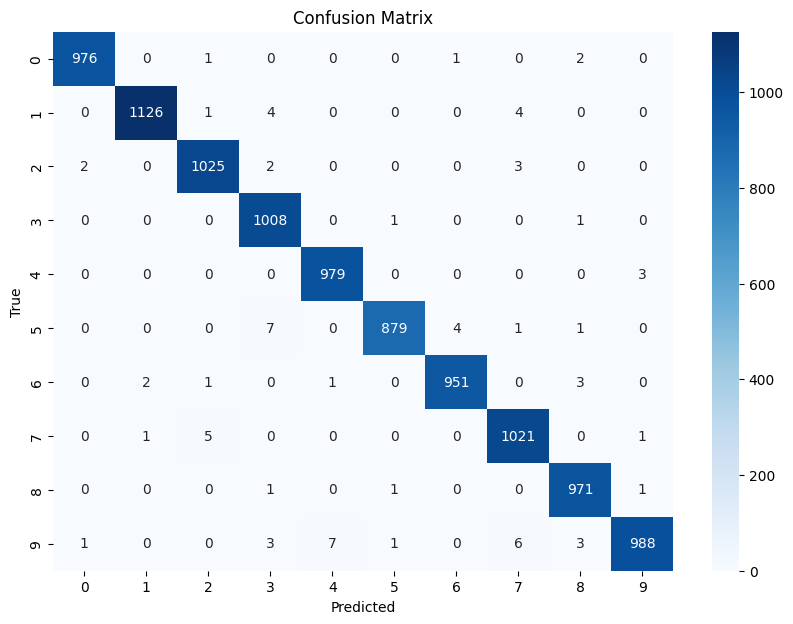

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred = np.argmax(model.predict(test_img), axis=1)
cm = confusion_matrix(test_labels, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
